# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
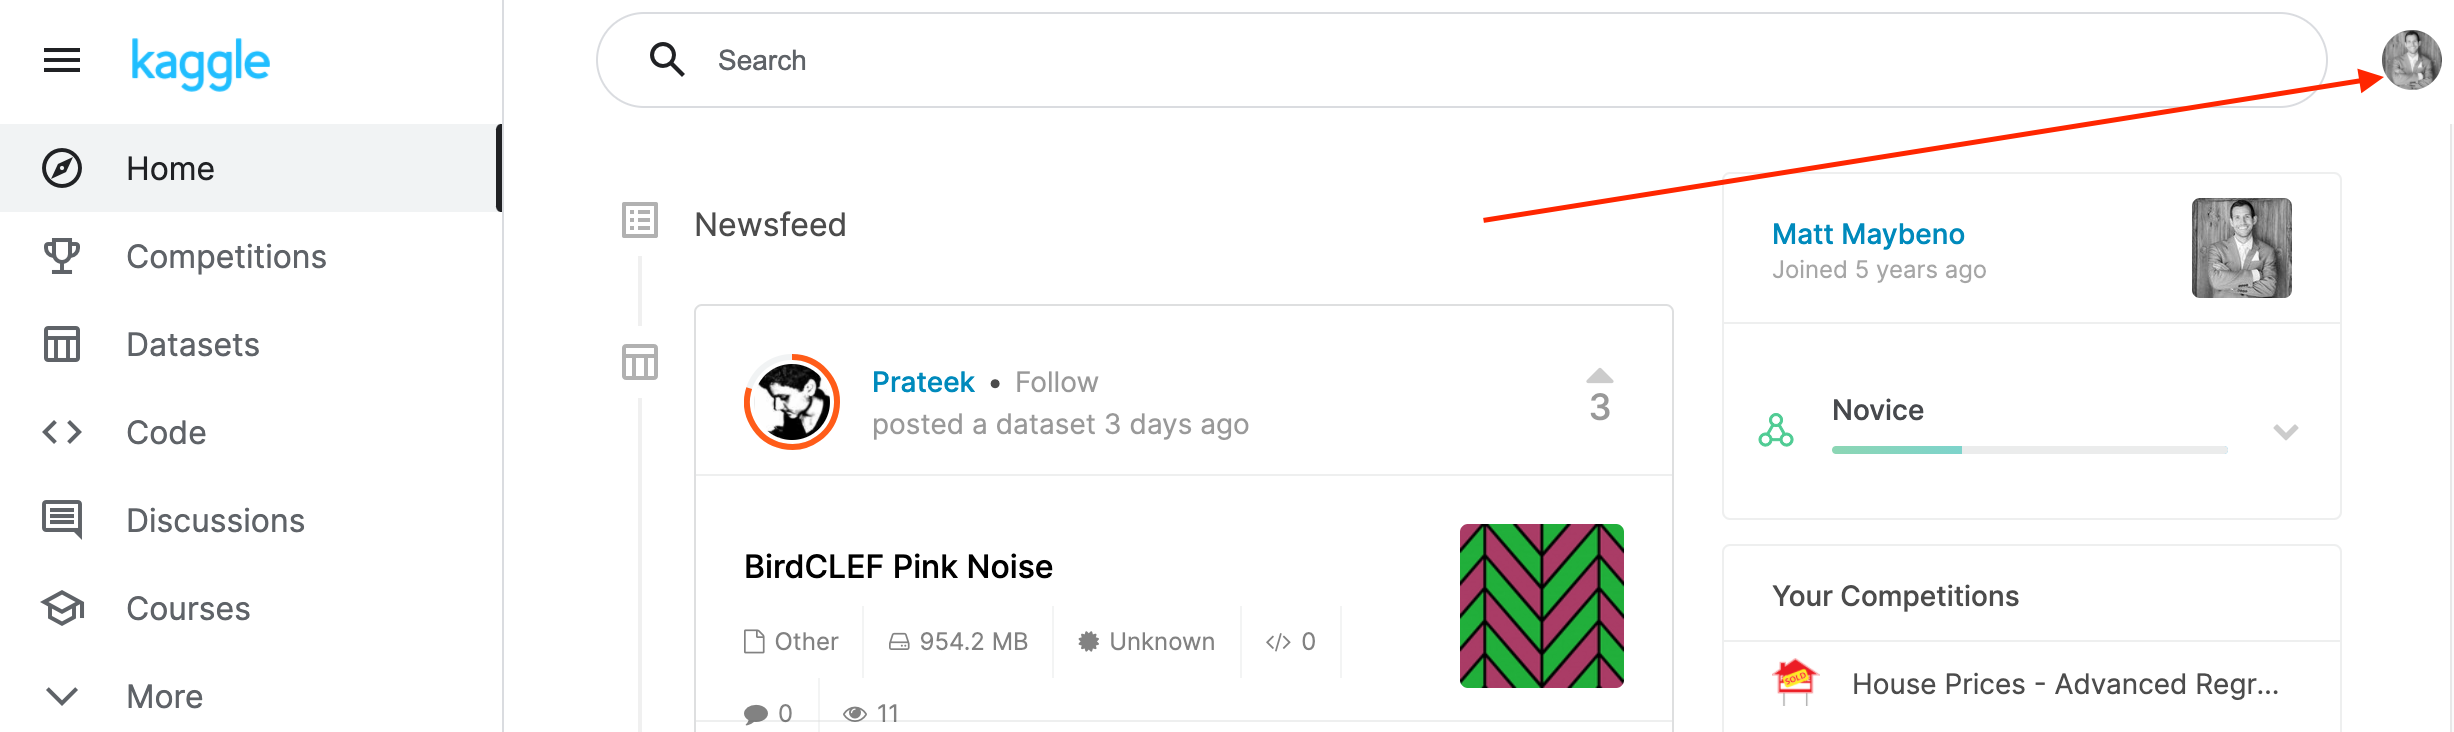
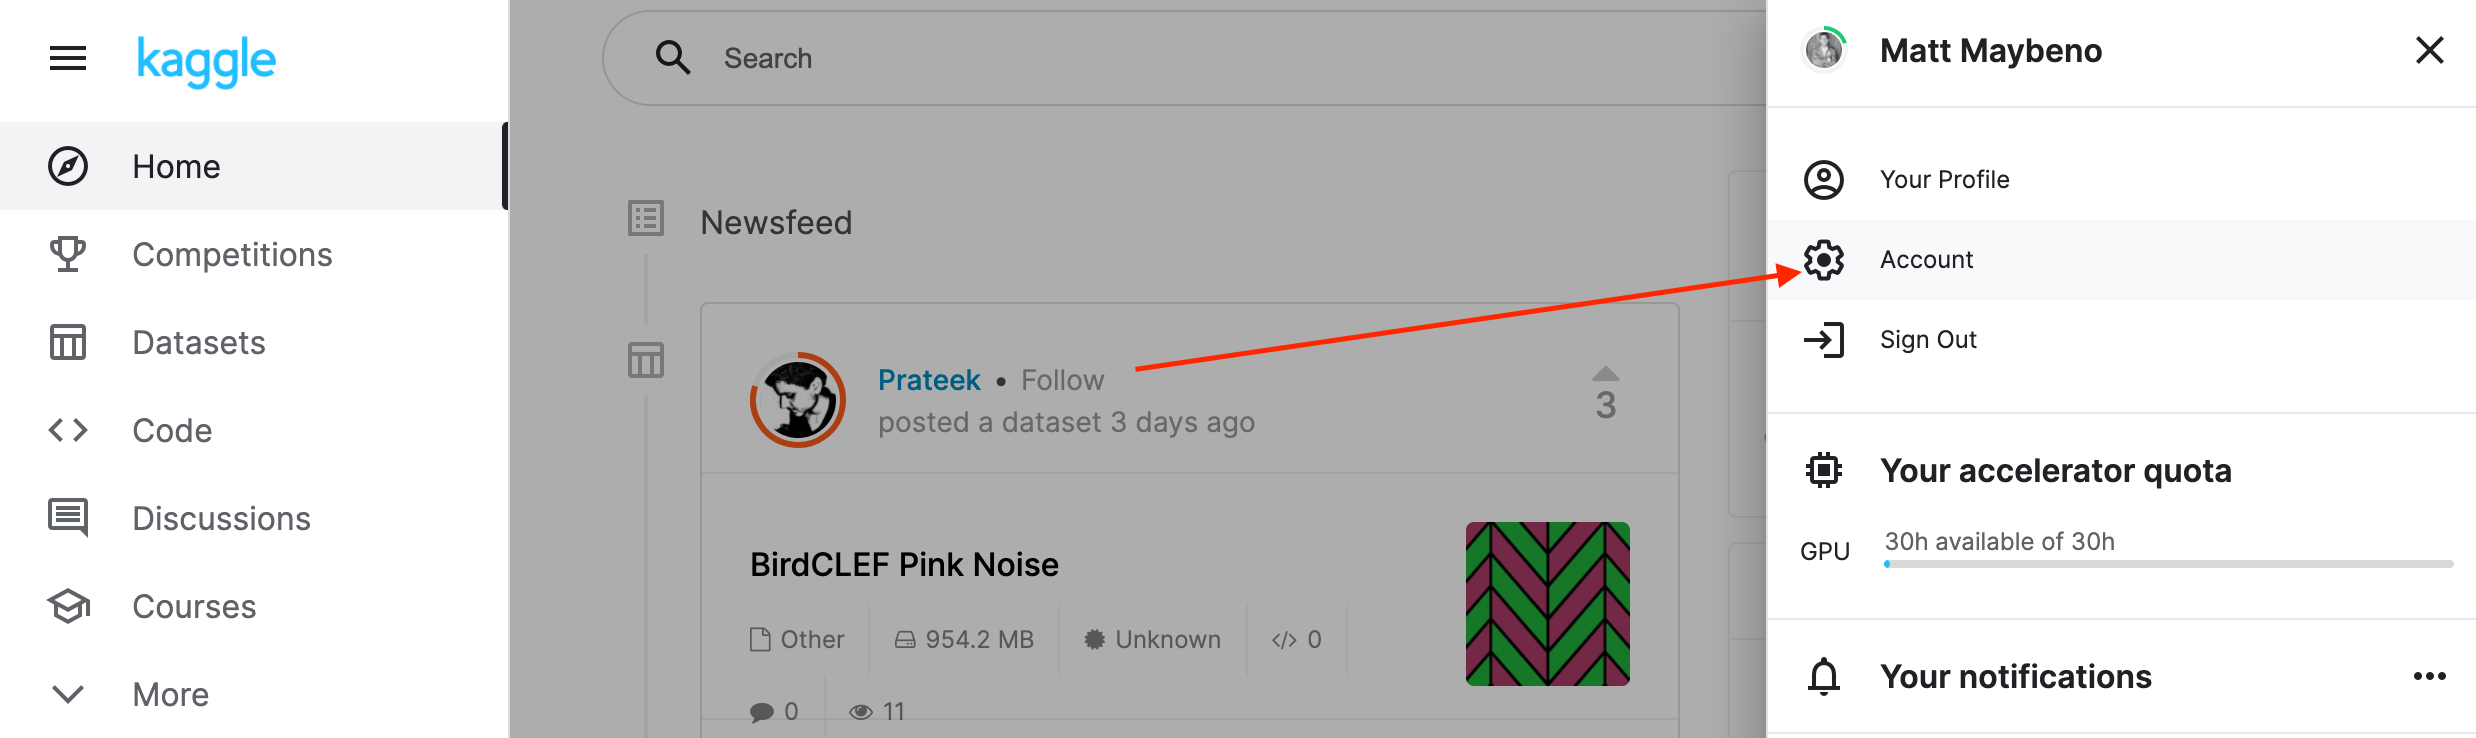
2. Scroll down to API and click Create New API Token.
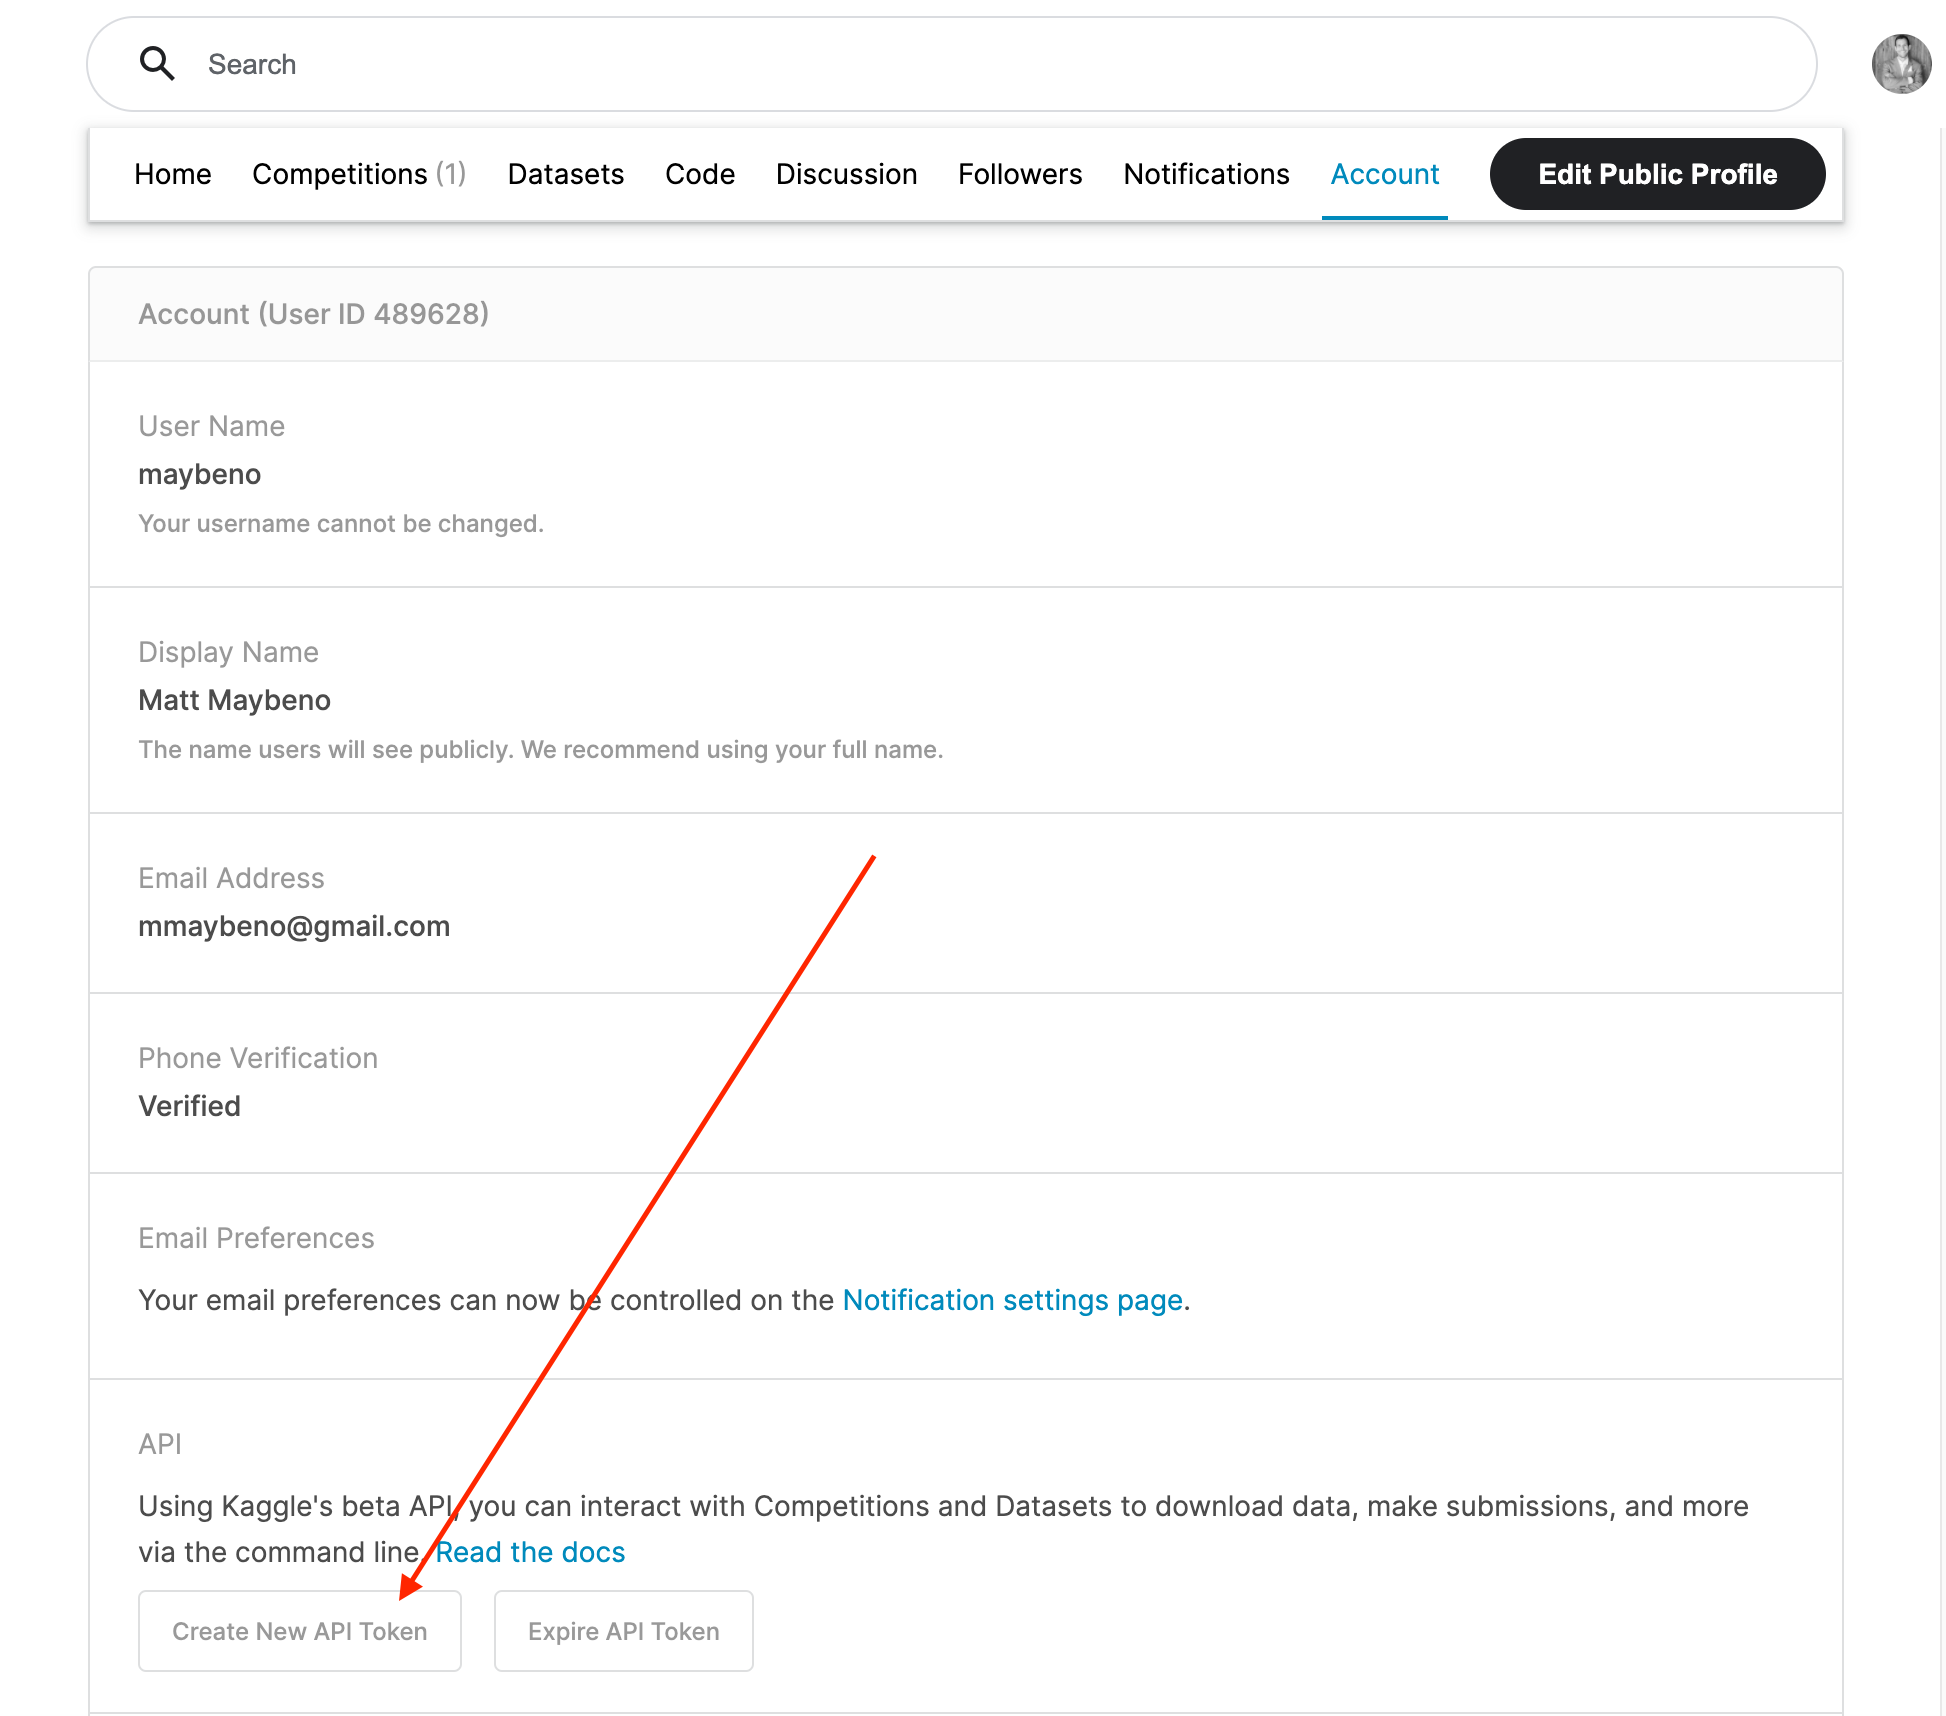
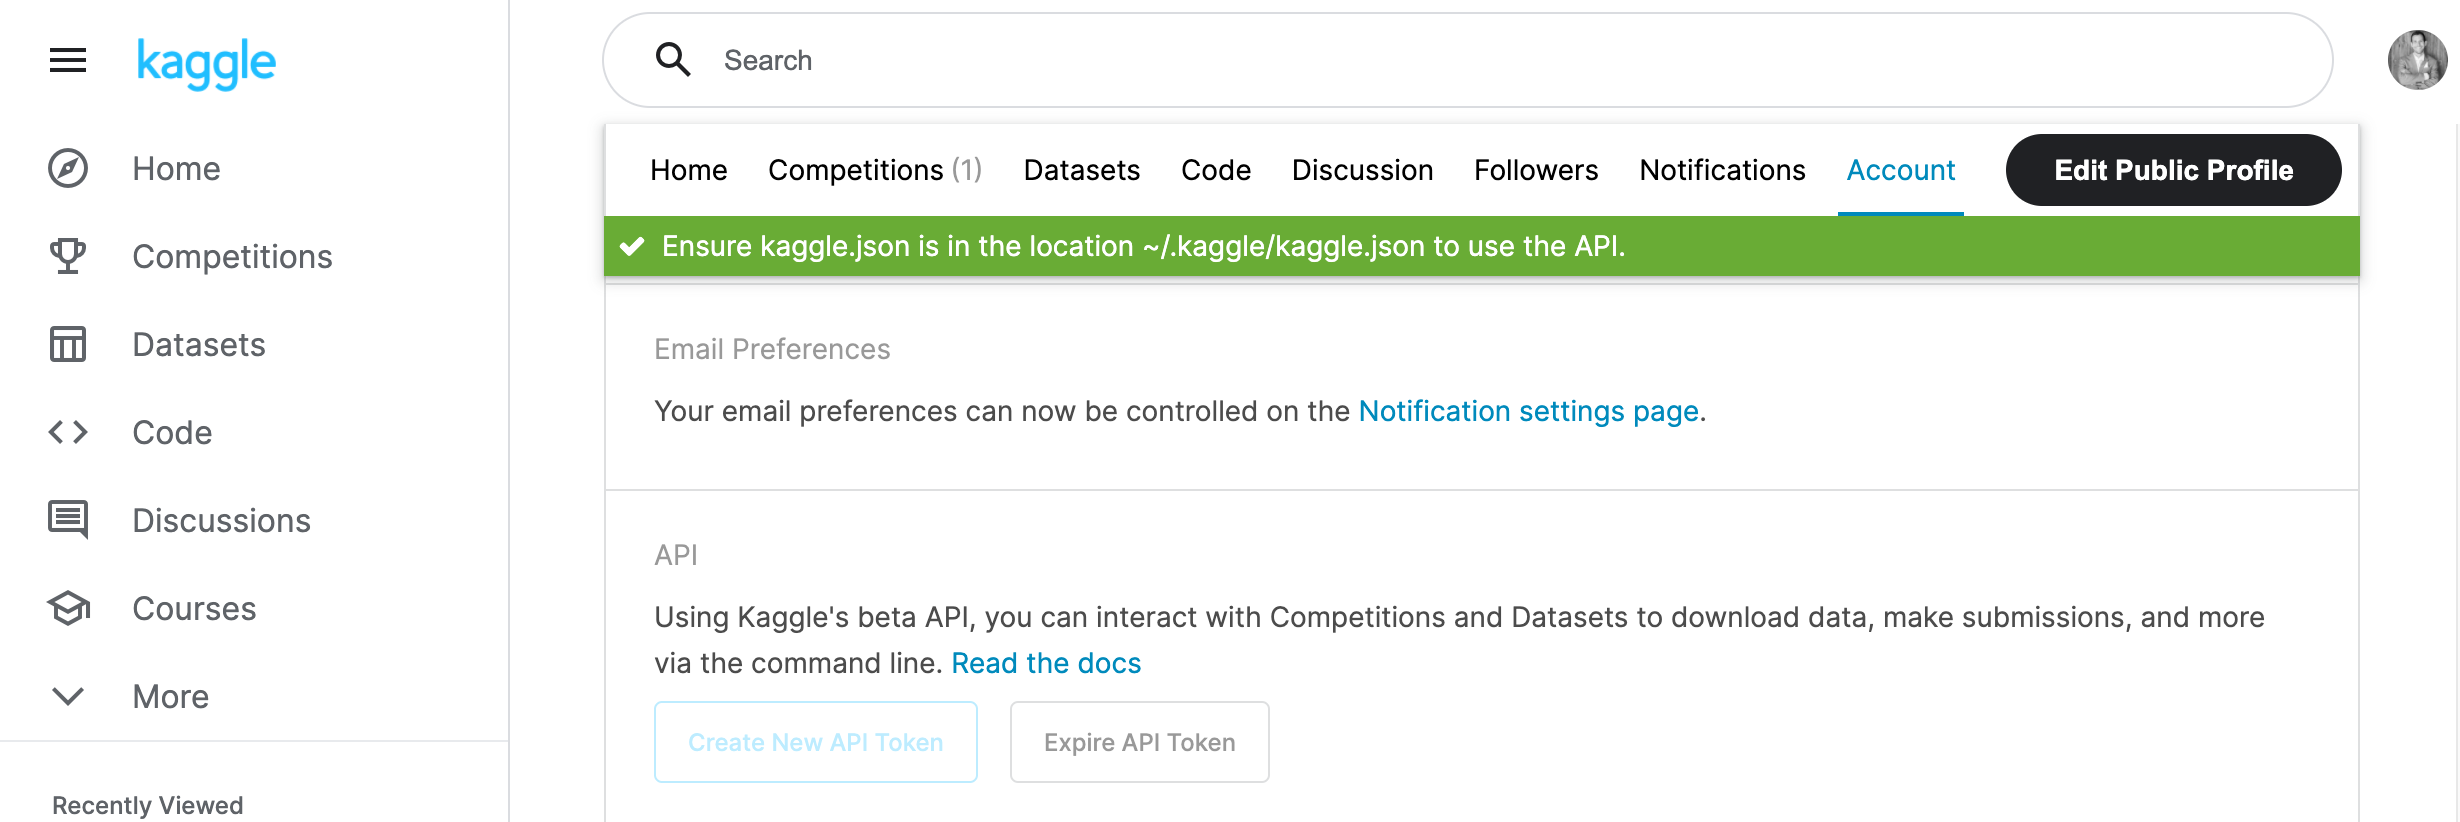
3. Open up `kaggle.json` and use the username and key.
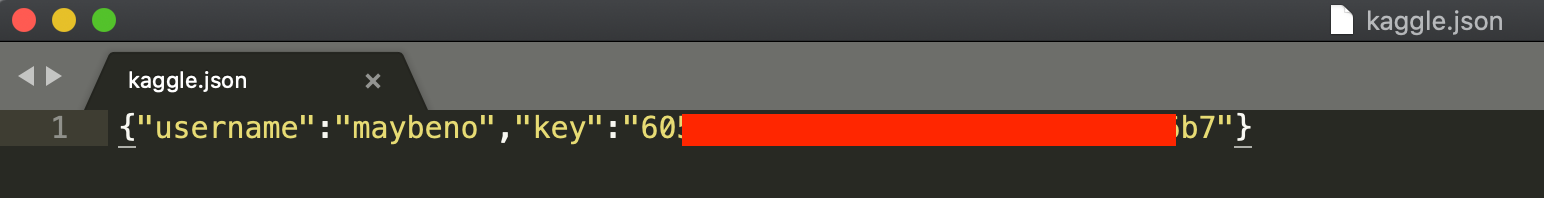

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
%pip install -U pip
%pip install -U setuptools wheel
%pip install -U "mxnet<2.0.0" bokeh==2.0.1
%pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Note: you may need to restart the kernel to use updated packages.
  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.0.38 requires setuptools~=60.2.0, but you have setuptools 69.5.1 which is incompatible.


  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl.metadata (402 bytes)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.18.4-py2.py3-none-any.whl.metadata (50 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached idna-2.6-py2.py3-none-any.whl.metadata (8.9 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl.metadata (32 kB)
Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
Using cached idna-2.6-py2.py3-none-any.whl (56 kB)
Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [240 lines of output]
      Running from numpy source directory.
      C:\Users\Rifat\AppData\Local\Temp\pip-install-qmkvde_s\numpy_523c975a0b5049438b77490d267c1652\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['c:\\Users\\Rifat\\Downloads\\UDACITY\\Predict-Bike-Sharing-Demand-with-AutoGluon\\.venv\\lib', 'C:\\']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries blis not found in ['c:\\Users\\Rifat\\Downloads\\UDACITY\\Predict-Bike

   ---------------------------------------- 0.0/953.1 kB ? eta -:--:--
   - -------------------------------------- 30.7/953.1 kB 1.4 MB/s eta 0:00:01
   -- ------------------------------------ 61.4/953.1 kB 825.8 kB/s eta 0:00:02
   -- ------------------------------------ 71.7/953.1 kB 660.6 kB/s eta 0:00:02
   -- ------------------------------------ 71.7/953.1 kB 660.6 kB/s eta 0:00:02
   ----- -------------------------------- 143.4/953.1 kB 655.8 kB/s eta 0:00:02
   ----- -------------------------------- 143.4/953.1 kB 655.8 kB/s eta 0:00:02
   -------- ----------------------------- 215.0/953.1 kB 691.9 kB/s eta 0:00:02
   -------- ----------------------------- 215.0/953.1 kB 691.9 kB/s eta 0:00:02
   ------------ ------------------------- 307.2/953.1 kB 731.4 kB/s eta 0:00:01
   ------------ ------------------------- 307.2/953.1 kB 731.4 kB/s eta 0:00:01
   ------------ ------------------------- 307.2/953.1 kB 731.4 kB/s eta 0:00:01
   ------------ ------------------------- 307.2/95

### Setup Kaggle API Key

In [2]:
# Install Kaggle package
%pip install -q kaggle

# Import necessary libraries
import json
from pathlib import Path
import os

# Set up Kaggle API credentials
api_token = {"username":"rifatperween","key":"b9a8100291fdfac3ab4d82e588075215"}

# Write Kaggle API credentials to file
kaggle_path = Path('/root/.kaggle')
kaggle_path.mkdir(parents=True, exist_ok=True)
with open(kaggle_path / 'kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Set appropriate permissions for the kaggle.json file
os.chmod(kaggle_path / 'kaggle.json', 0o600)


Note: you may need to restart the kernel to use updated packages.


In [3]:
# # Fill in your user name and key from creating the kaggle account and API token file
# import json
# kaggle_username = "rifatperween"
# kaggle_key = "b9a8100291fdfac3ab4d82e588075215"

# # Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
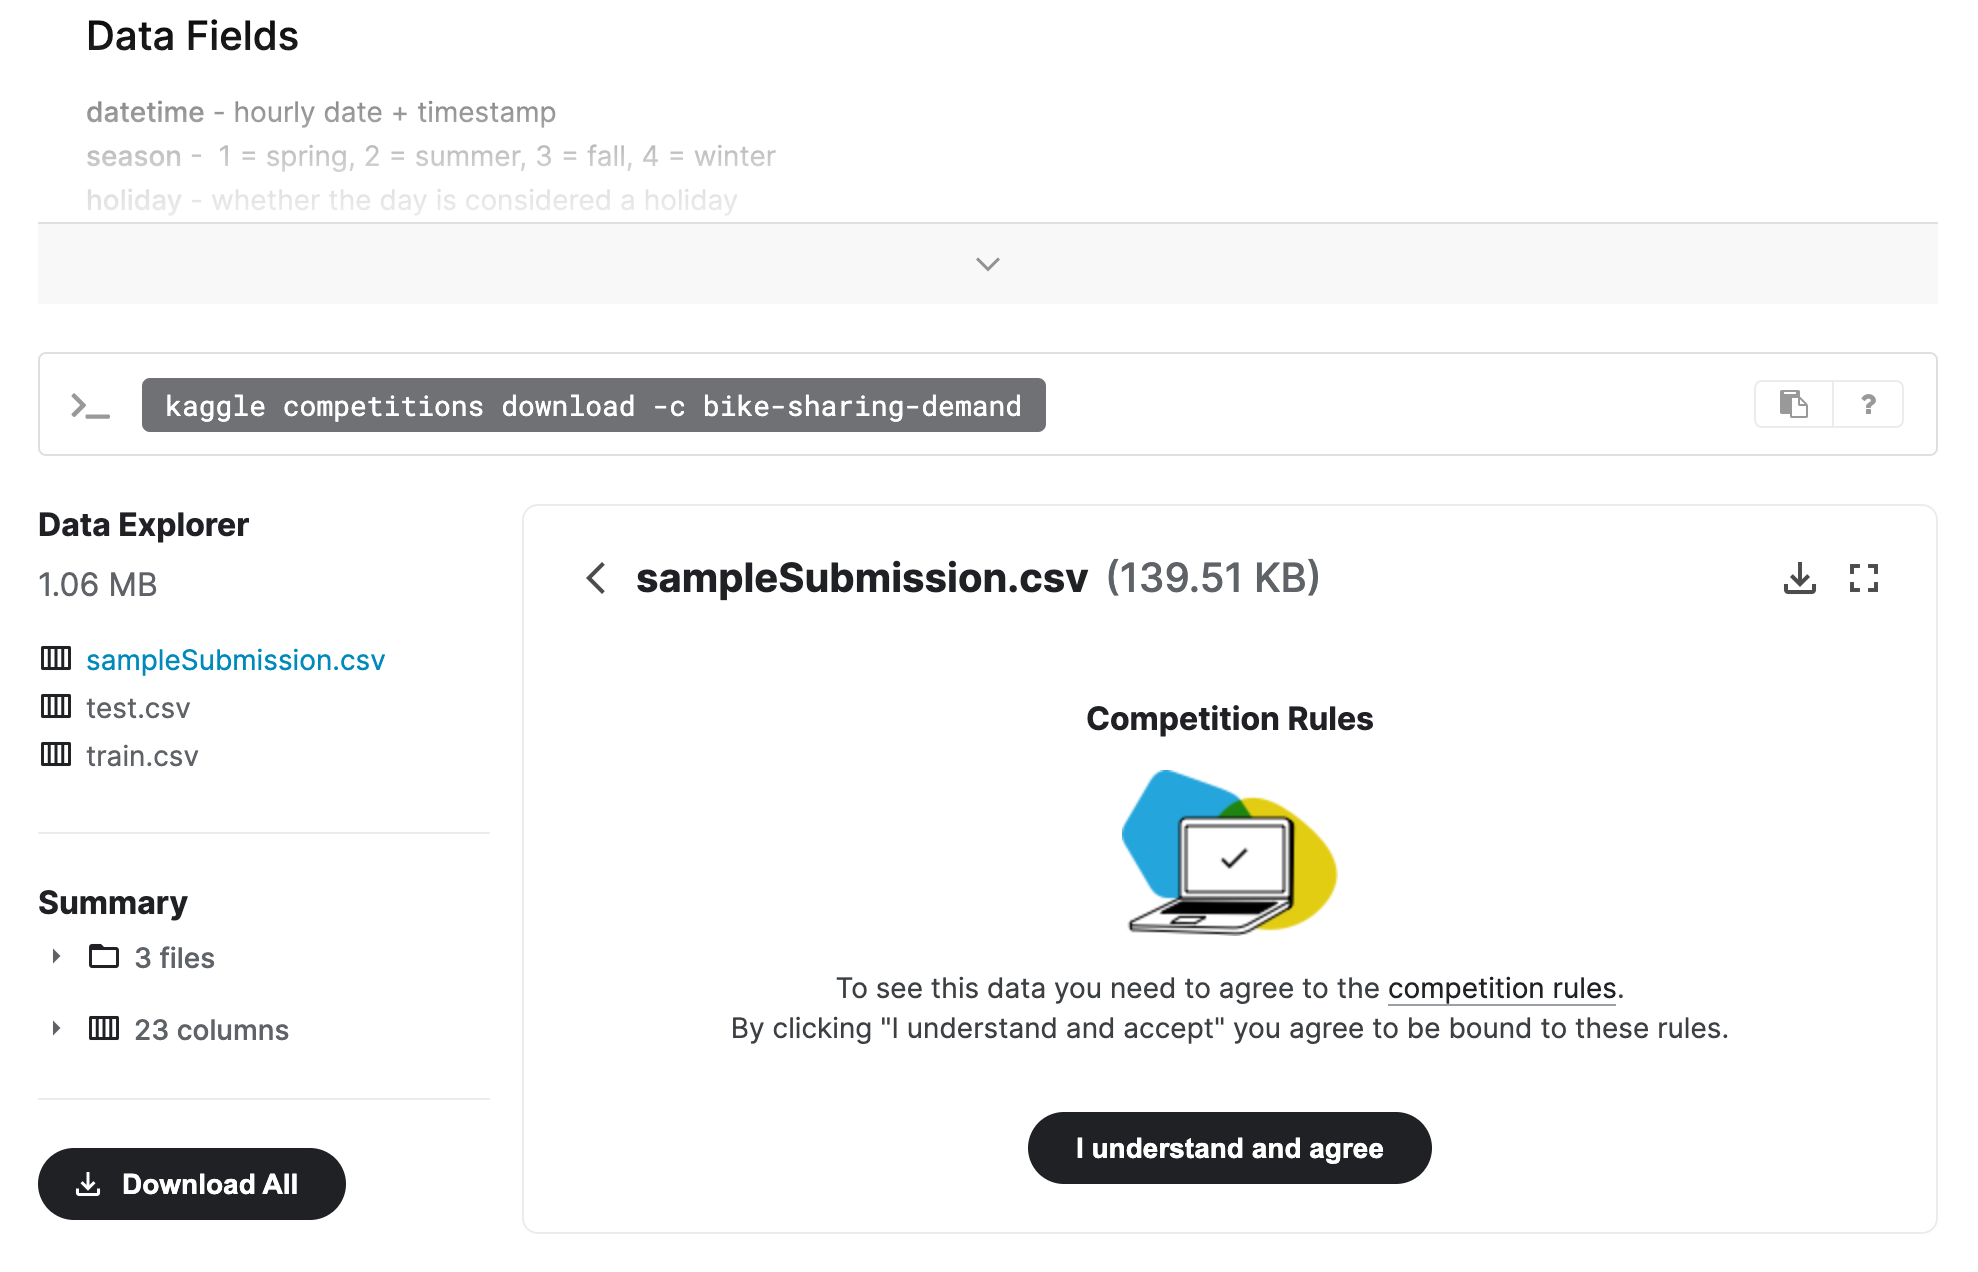

In [4]:
# import subprocess
# import zipfile

# # Download the dataset using the Kaggle API
# subprocess.run(["kaggle", "competitions", "download", "-c", "bike-sharing-demand"])

# # Unzip the downloaded file
# with zipfile.ZipFile("bike-sharing-demand.zip", "r") as zip_ref:
#     zip_ref.extractall()


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

c:\Users\Rifat\Downloads\UDACITY\Predict-Bike-Sharing-Demand-with-AutoGluon\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
predictor = TabularPredictor(
    label="count",
    eval_metric='root_mean_squared_error',
    verbosity=0,
    learner_kwargs={"ignored_columns":["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

2024-04-29 23:20:34,608	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


### Review AutoGluon's training run with ranking of models that did the best.

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.623355  root_mean_squared_error      14.549019  316.117804                0.000997           0.109203            3       True         18
1   NeuralNetFastAI_BAG_L2  -51.656456  root_mean_squared_error      13.351812  295.173751                0.450343          34.235317            2       True         16
2   RandomForestMSE_BAG_L2  -53.393492  root_mean_squared_error      13.504903  277.846580                0.603434          16.908146            2       True         13
3     ExtraTreesMSE_BAG_L2  -54.011431  root_mean_squared_error      13.494245  264.865138                0.592776           3.926704            2       True         15
4          LightGBM_BAG_L2  -55.020770  root_mean_squared_error      13.180090  265.642638   

c:\Users\Rifat\Downloads\UDACITY\Predict-Bike-Sharing-Demand-with-AutoGluon\.venv\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_pe

### Create predictions from test dataset

In [12]:
predictions = predictor.predict(test)
predictions.head()

0    25.784916
1    42.644440
2    47.167732
3    49.173897
4    51.427979
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [13]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      101.348045
std        87.642426
min         2.148525
25%        24.477745
50%        70.509415
75%       166.872635
max       353.064758
Name: count, dtype: float64

In [14]:
# How many negative values do we have?
predictions.lt(0).sum()

0

In [15]:
# Set them to zero
predictions.describe()

count    6493.000000
mean      101.348045
std        87.642426
min         2.148525
25%        24.477745
50%        70.509415
75%       166.872635
max       353.064758
Name: count, dtype: float64

In [16]:
predictions.tail()

6488    157.543106
6489    157.546448
6490    160.404282
6491    149.472351
6492    149.770950
Name: count, dtype: float32

In [17]:
# set them to zero
predictions=predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions
# round count column
submission['count']=submission['count'].apply(lambda x:round(x))
submission.to_csv("submission.csv", index=False)

In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\Rifat\Downloads\UDACITY\Predict-Bike-Sharing-Demand-with-AutoGluon\.venv\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "c:\Users\Rifat\Downloads\UDACITY\Predict-Bike-Sharing-Demand-with-AutoGluon\.venv\Lib\site-packages\kaggle\__init__.py", line 7, in <module>
    api.authenticate()
  File "c:\Users\Rifat\Downloads\UDACITY\Predict-Bike-Sharing-Demand-with-AutoGluon\.venv\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Rifat\.kaggle. Or use the environment method.


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'tail' is not recognized as an internal or external command,
operable program or batch file.


#### Initial score of `1.38713`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

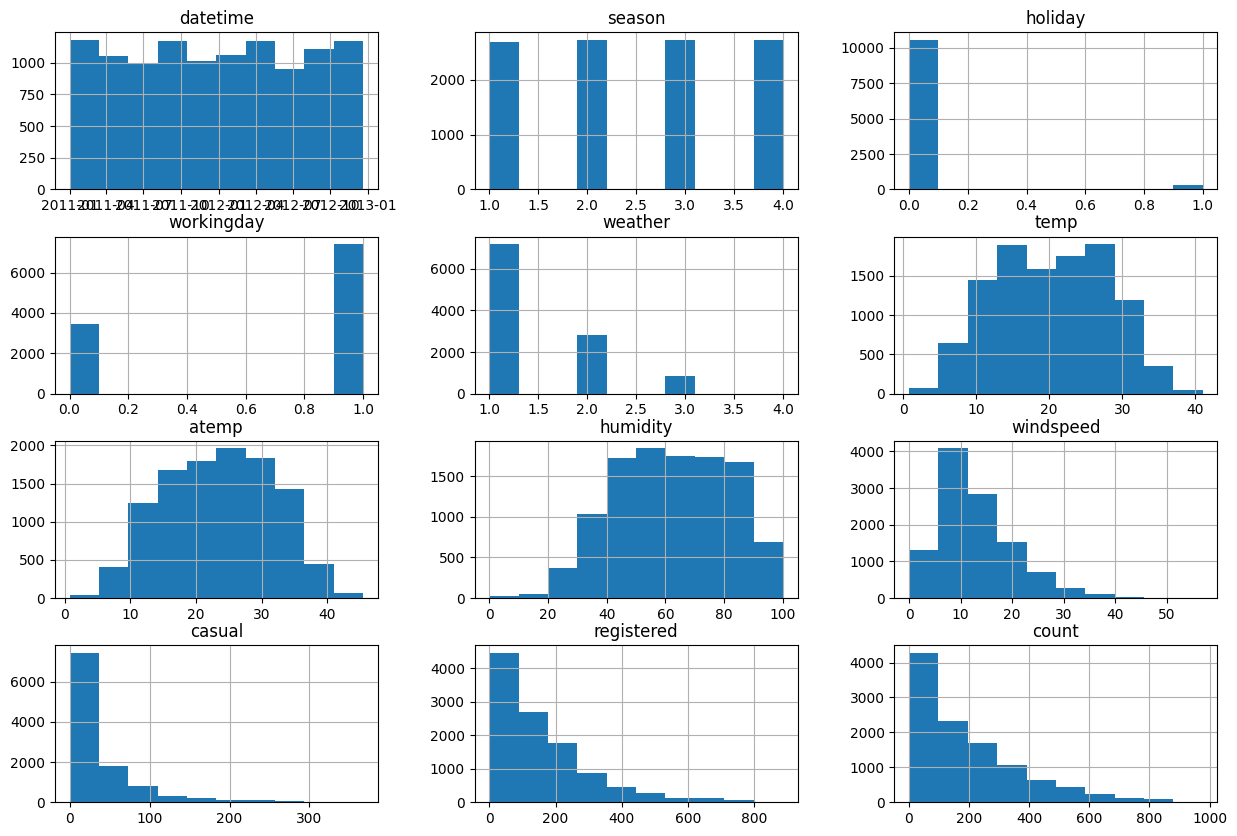

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,10))

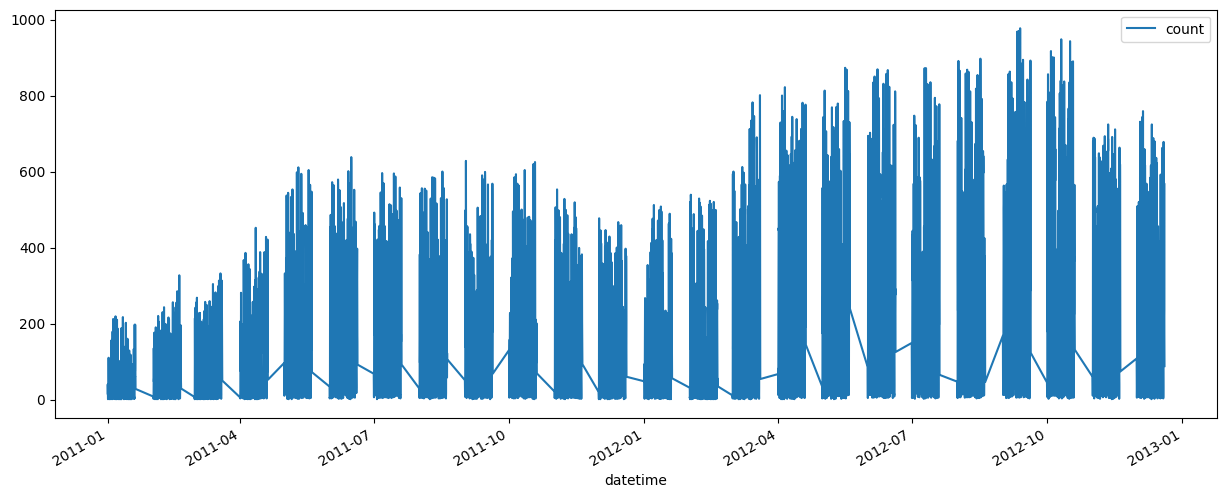

In [22]:
# time series plot for demand
train.plot(x='datetime', y='count', figsize=(15, 6));

<Axes: xlabel='datetime'>

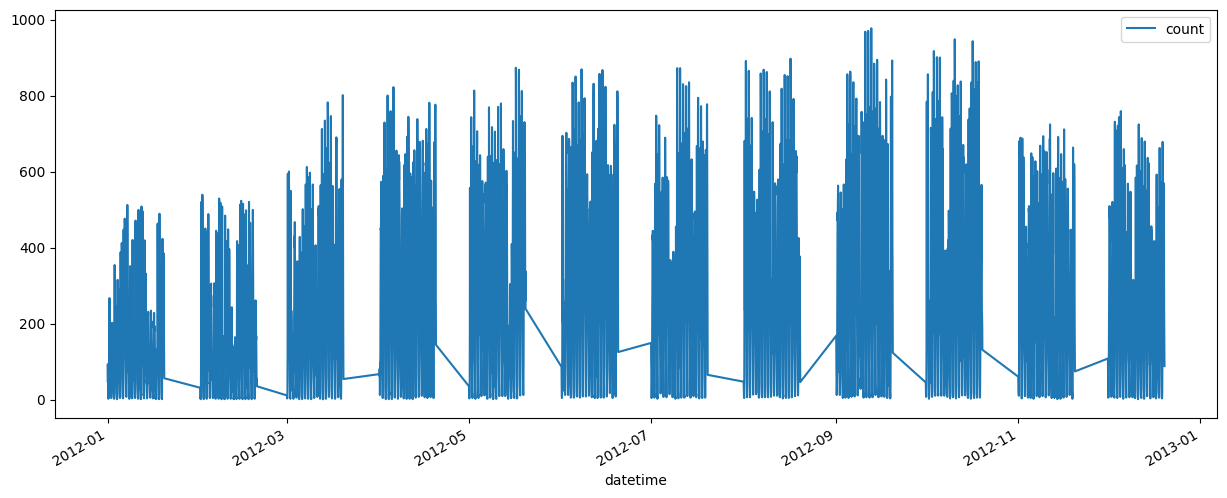

In [26]:
# time series plot for demand for a particular year
train.loc[train.datetime.dt.year == 2012].plot(x='datetime', y='count', figsize=(15, 6))

<Axes: xlabel='datetime'>

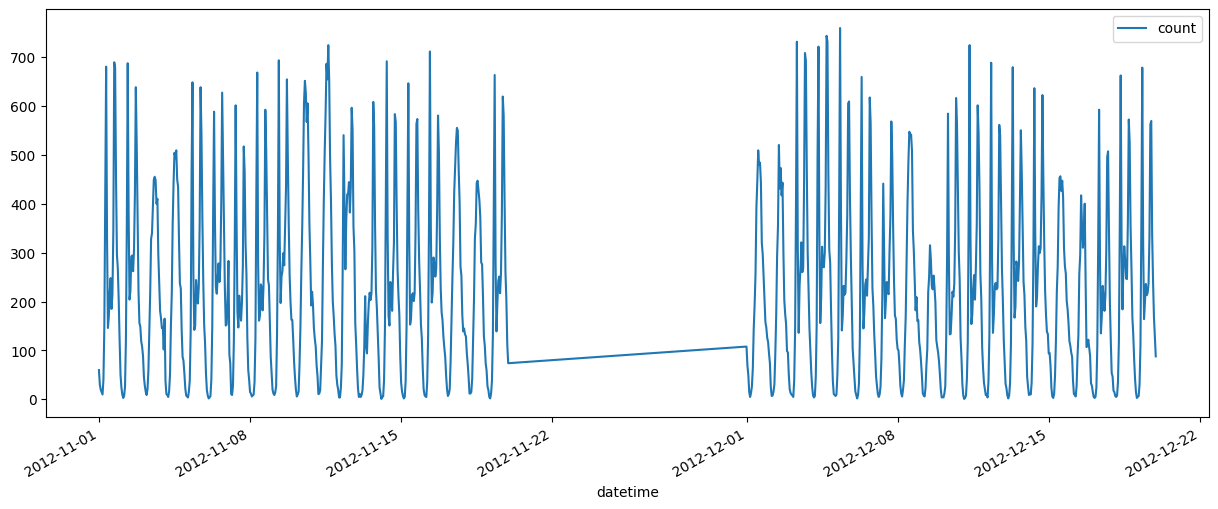

In [27]:
# time series plot for two consecutive months
train.loc[(train.datetime.dt.year == 2012) & ((train.datetime.dt.month == 11) | (train.datetime.dt.month == 12))].plot(x='datetime', y='count', figsize=(15, 6))

<Axes: xlabel='datetime'>

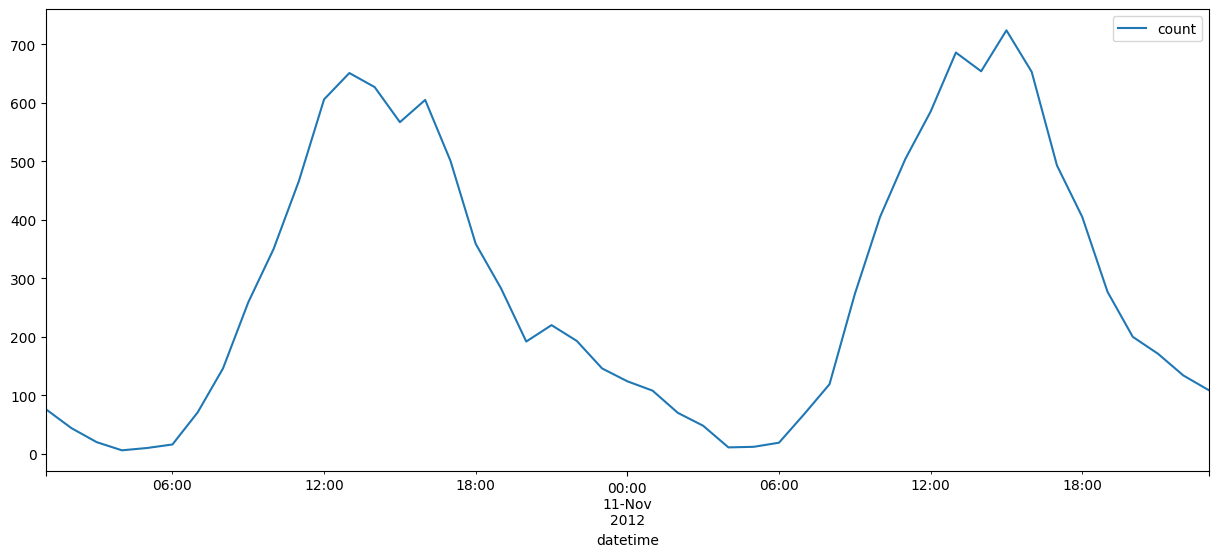

In [28]:
# time series plot for a particular weekend
train.loc[(train.datetime > '2012-11-10') & (train.datetime < '2012-11-12')].plot(x='datetime', y='count', figsize=(15, 6))

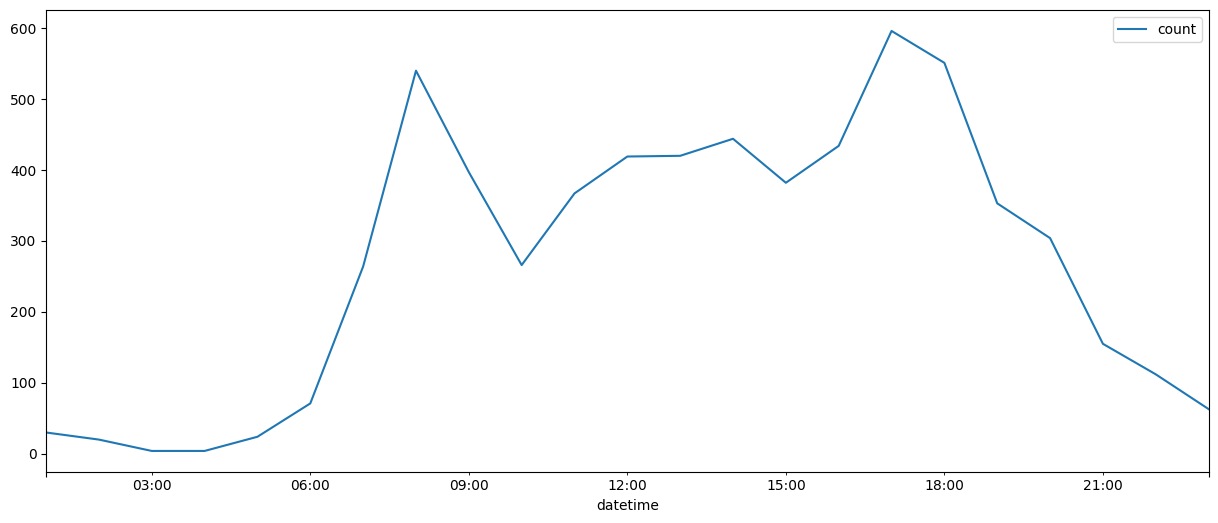

In [29]:
# time series plot for a particular weekday: Monday
train.loc[(train.datetime > '2012-11-12') & (train.datetime < '2012-11-13')].plot(x='datetime', y='count', figsize=(15, 6));

In [31]:
# Seperate hour, day, month from datetime
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

In [33]:
# create a new feature: time_of_day
def get_time_of_day(x):
    if (x > 4) and (x <= 8):
        return 0 # Early Morning
    elif (x > 8) and (x <= 12 ):
        return 1 # Morning
    elif (x > 12) and (x <= 16):
        return 2 # Noon
    elif (x > 16) and (x <= 20) :
        return 3 # Evening
    elif (x > 20) and (x <= 24):
        return 4 # Night
    elif (x <= 4):
        return 5 # Late Night


train['time_of_day'] = train['hour'].apply(get_time_of_day)
test['time_of_day'] = test['hour'].apply(get_time_of_day)

In [34]:
# create a new feature: temp_category
def get_temp_category(x):
    if x <= 10:
        return 0 # low temp
    elif (x > 10) and (x <= 25 ):
        return 1 # mild temp
    elif (x > 25):
        return 2 # hot temp


train['temp_category'] = train['temp'].apply(get_temp_category)
test['temp_category'] = test['temp'].apply(get_temp_category)

In [35]:
# create a new feature: wind_category
def get_wind_category(x):
    if x <= 15:
        return 0 # normal wind
    elif (x > 10):
        return 1 # high wind


train['wind_category'] = train['windspeed'].apply(get_wind_category)
test['wind_category'] = test['windspeed'].apply(get_wind_category)

In [36]:
# create a new feature: humid_category
def get_humid_category(x):
    if x <= 30:
        return 0 # low humidity
    elif (x > 30) and (x <= 50 ):
        return 1 # normal humidity
    elif (x > 50):
        return 2 # high humidity

train['humid_category'] = train['humidity'].apply(get_humid_category)
test['humid_category'] = test['humidity'].apply(get_humid_category)

In [37]:
# create a new feature: atemp_category
def get_atemp_category(x):
    if x <= 10:
        return 0 # low temp
    elif (x > 10) and (x <= 25 ):
        return 1 # mild temp
    elif (x > 25):
        return 2 # hot temp


train['atemp_category'] = train['atemp'].apply(get_atemp_category)
test['atemp_category'] = test['atemp'].apply(get_atemp_category)

In [38]:
train.drop(['datetime', 'temp', 'windspeed', 'humidity', 'atemp'], axis=1, inplace=True)
test.drop(['datetime', 'temp', 'windspeed', 'humidity', 'atemp'], axis=1, inplace=True)

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 281.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 479.1 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 469.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 469.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 426.7 kB/s eta 0:00:01
   --------------------- ---------------- 163.8/294.9 kB 468.3 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 420.1 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 437.8 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 430.1 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 

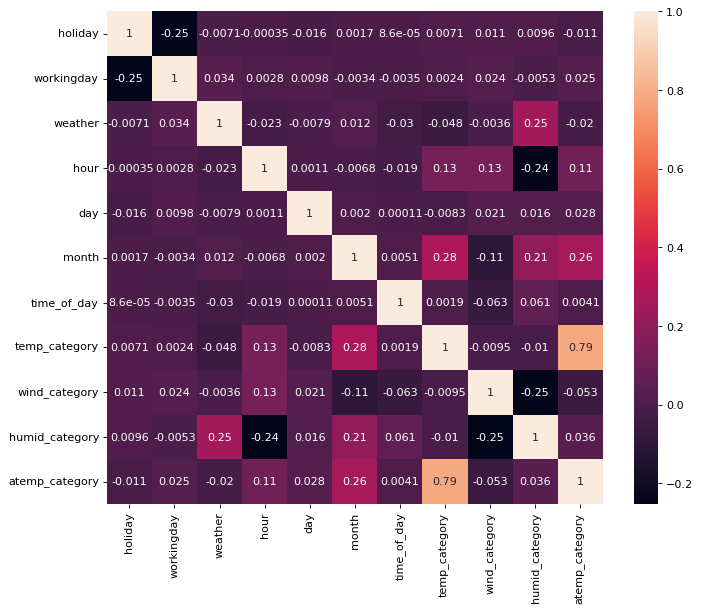

In [41]:
%pip install seaborn
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=80)

sn.heatmap(train.drop(['count', 'registered','casual'], axis=1).corr(), annot=True)
plt.show()

In [43]:
# # create a new feature
# train.drop(['season'], axis=1, inplace=True)
# test.drop(['season'], axis=1, inplace =True)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [44]:
train['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [45]:
train["weather"] =train["weather"].astype('category')
train["time_of_day"] = train["time_of_day"].astype('category')
train["temp_category"] = train["temp_category"].astype('category')
train["wind_category"] = train["wind_category"].astype('category')
train["humid_category"] = train["humid_category"].astype('category')
train["holiday"] = train["holiday"].astype('category')
train["workingday"] = train["workingday"].astype('category')
train["hour"] = train["hour"].astype('category')
train["month"] = train["month"].astype('category')

test["weather"] = test["weather"].astype('category')
test["time_of_day"] = test["time_of_day"].astype('category')
test["temp_category"] = test["temp_category"].astype('category')
test["wind_category"] = test["wind_category"].astype('category')
test["humid_category"] = test["humid_category"].astype('category')
test["holiday"] = test["holiday"].astype('category')
test["workingday"] = test["workingday"].astype('category')
test["hour"] = test["hour"].astype('category')
test["month"] = test["month"].astype('category')

In [46]:
# View are new feature
train.head()

,holiday,workingday,weather,casual,registered,count,hour,day,month,time_of_day,temp_category,wind_category,humid_category,atemp_category
0,0,0,1,3,13,16,0,1,1,5,0,0,2,1
1,0,0,1,8,32,40,1,1,1,5,0,0,2,1
2,0,0,1,5,27,32,2,1,1,5,0,0,2,1
3,0,0,1,3,10,13,3,1,1,5,0,0,2,1
4,0,0,1,0,1,1,4,1,1,5,0,0,2,1


array([[<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'atemp_category'}>, <Axes: >]],
      dtype=object)

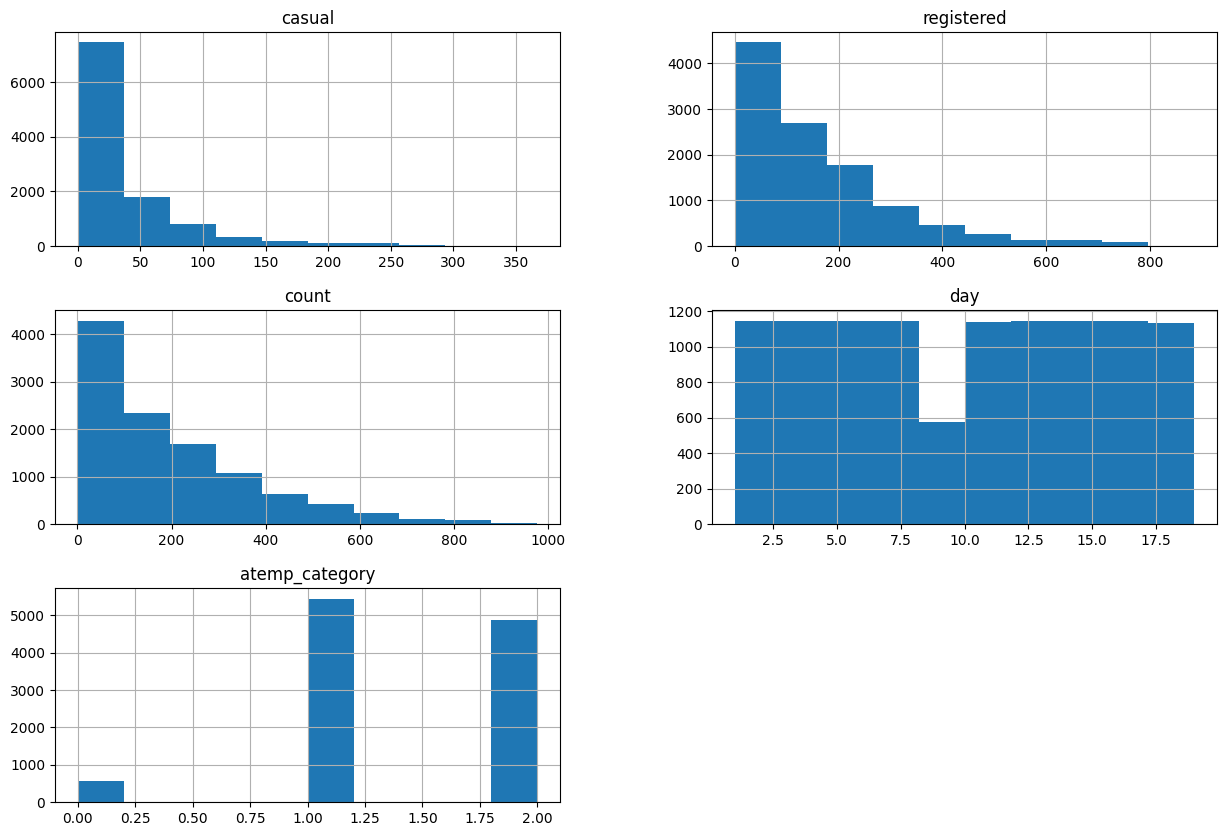

In [47]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [48]:
predictor_new_features = TabularPredictor(
    label="count", 
    verbosity=0,
    eval_metric = 'root_mean_squared_error', 
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600, 
    presets="best_quality"
)

In [50]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -60.378156  root_mean_squared_error      21.233232  383.962057                0.000503           0.093907            3       True         17
1     ExtraTreesMSE_BAG_L2  -60.794525  root_mean_squared_error      19.987797  272.318501                0.555001           4.079123            2       True         15
2          CatBoost_BAG_L2  -61.074001  root_mean_squared_error      19.637726  358.052537                0.204930          89.813160            2       True         14
3          LightGBM_BAG_L2  -61.431911  root_mean_squared_error      19.632787  272.134351                0.199991           3.894973            2       True         12
4   RandomForestMSE_BAG_L2  -61.946975  root_mean_squared_error      19.942128  278.983458   

c:\Users\Rifat\Downloads\UDACITY\Predict-Bike-Sharing-Demand-with-AutoGluon\.venv\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -203.021662591

In [51]:
# Remember to set all negative values to zero
predictions=predictions.clip(lower=0)

In [52]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_features["count"] = predictions
# Round count column values
submission_new_features['count'] = submission_new_features['count'].apply(lambda x: round(x))
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.58444`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [56]:
%pip install -q ipywidgets==7.4.2
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Note: you may need to restart the kernel to use updated packages.


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [67]:
import autogluon as ag

hyperparameters = {
    'GBM': {'num_boost_round': 100, 'num_leaves': ag.space.Int(lower=26, upper=66, default=36)},
    'CAT': {'iterations': 10000},
    'RF': {'n_estimators': 300},
    'XT': {'n_estimators': 300},
    'NN': {
        'num_epochs': 10,
        'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
        'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
        'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),
        'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
    }
}

hyperparameter_tune_kwargs = {
    'scheduler': 'local',
    'searcher': 'bayesopt'
}

predictor_new_hpo = ag.tabular.TabularPredictor(
    label="count",
    verbosity=0,
    eval_metric='root_mean_squared_error',
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)


AttributeError: module 'autogluon' has no attribute 'space'

In [ ]:
predictor_new_hpo.fit_summary()

In [ ]:

predictions = predictor_new_hpo.predict(test)

In [ ]:
# Remember to set all negative values to zero
predictions = predictions.clip(lower=0)

In [ ]:
# Same submitting predictions
submission_hpo = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_hpo["count"] = predictions
# Round count column values
submission_hpo['count'] = submission_hpo['count'].apply(lambda x: round(x))
submission_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:

# The 3 hyperparameters we tuned with the kaggle score as the result
pd.set_option('display.max_colwidth', 60)
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "'CAT': {'iterations': 10000},'RF': {'n_estimators': 300},'XT': {'n_estimators': 300}"],
    "hpo2": ["default", "default", "GB: num_boost_round=100, num_leaves(lower=26, upper=66, default=36)"],
    "hpo3": ["default", "default", "scheduler: local, searcher: bayesopt"],
    "score": [1.38713, 0.58444, 0.56331]
})